# Question 1 - Analysis 1

In [19]:
# Import statements
import json, os, glob, email, fnmatch, string, nltk, re, operator, matplotlib.pyplot as plt
from email.message import EmailMessage
from datetime import datetime

In [20]:
# Take relative path for data from the sibling folder of parent folder of this file
current_dir = os.path.dirname('__file__')
data_dir = os.path.join(current_dir, '..', 'data','enron')      # user '..' moves one stup up

# Read all the files and get their relative paths in a list
matches = []
for root, dirnames, filenames in os.walk(data_dir):
    for filename in fnmatch.filter(filenames, '*'):
        matches.append(os.path.join(root, filename))

In [21]:
message_of_interest=[]
dictionary_for_dates = {}

# Read all the files and extract the datesfor each mail
for filename in matches:
    with open(filename,'r') as f:
        
        # Read email as raw file
        data_from_file =  f.read()
        
        # Read message from string for easy access
        message = email.message_from_string(data_from_file)
        if message['Date'][:3] not in dictionary_for_dates:
            dictionary_for_dates[message['Date'][:3]] = 1
        else:
            dictionary_for_dates[message['Date'][:3]] += 1

In [22]:
#Sort the dictionary according to values
sorted_weekday_dict = sorted(dictionary_for_dates.items(), key=operator.itemgetter(1), reverse=True)

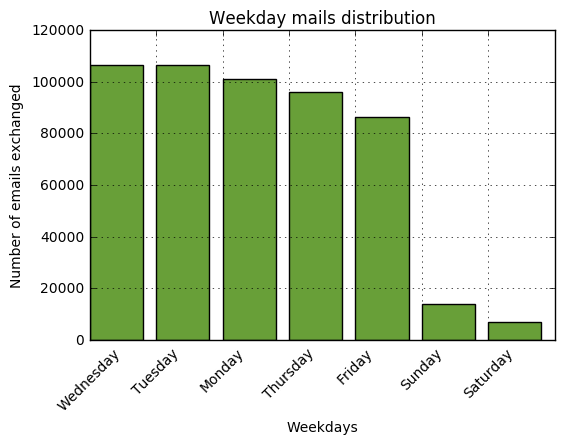

In [29]:
# x and y axes and weekdays for lables
x_val = []
y_val = []
weekdays = []
count = 0       # To counter the numpy usage restriction
for value in sorted_weekday_dict:
    
    # Use weekday as x axis variables
    if value[0] == 'Mon':
        weekdays.append('Monday')
    elif value[0] == 'Tue':
        weekdays.append('Tuesday')
    elif value[0] == 'Wed':
        weekdays.append('Wednesday')
    elif value[0] == 'Thu':
        weekdays.append('Thursday')
    elif value[0] == 'Fri':
        weekdays.append('Friday')
    elif value[0] == 'Sat':
        weekdays.append('Saturday')
    elif value[0] == 'Sun':
        weekdays.append('Sunday')
    count+=1
    x_val.append(count)
    y_val.append(value[1])

fig = plt.figure()                                                           
plt.bar(x_val, y_val, color='#689F38')                                       #Graph type with values for both axes
plt.grid(True)                                                               #Show grid
plt.xticks(x_val, weekdays,  rotation=45)
plt.ylabel('Number of emails exchanged')
plt.xlabel('Weekdays')
plt.title('Weekday mails distribution')  
# fig.set_figwidth(12, 10)                                                     #Graph width
plt.show()                                                                   ##Show graph

In [30]:
# Function to get relative path to store the png file
def create_directory_for_output():
    current_dir = os.path.dirname('__file__')
    data_folder = os.path.join(current_dir, 'ana_1')
    if not os.path.exists(data_folder):
        os.mkdir(data_folder)
    return data_folder

output_folder=create_directory_for_output()

In [31]:
# File name
file_name = 'most_active_days'
file_path = os.path.join(output_folder, file_name)
file_path+='.png'

#Save the plot
fig.savefig(file_path, bbox_inches='tight')   # save the figure to file